In [67]:
import pandas as pd
import scipy.stats as stats
import statistics
from scipy import stats
from math import sqrt

In [68]:
df_titan = pd.read_csv("Titan_data1.csv")

In [69]:
df_titan.shape

(30, 3)

In [70]:
df_titan.columns

Index(['SALESPERSON', 'Old Scheme (in thousands)',
       'New Scheme (in thousands)'],
      dtype='object')

In [71]:
df_titan.describe()

,SALESPERSON,Old Scheme (in thousands),New Scheme (in thousands)
count,30.000000,30.000000,30.000000
mean,15.500000,68.033333,72.033333
std,8.803408,20.455980,24.062395
min,1.000000,28.000000,32.000000
25%,8.250000,54.000000,55.000000
50%,15.500000,67.000000,74.000000
75%,22.750000,81.500000,85.750000
max,30.000000,110.000000,122.000000


# A1:mean of New scheme and Old scheme column

In [72]:
mean_New_Scheme = df_titan.describe().loc["mean","New Scheme (in thousands)"]

In [73]:
mean_Old_Scheme = df_titan.describe().loc["mean","Old Scheme (in thousands)"]

In [74]:
print("Mean of New Scheme is {}".format(mean_New_Scheme))

Mean of New Scheme is 72.03333333333333


In [75]:
print("Mean of Old Scheme is {}".format(mean_Old_Scheme))

Mean of Old Scheme is 68.03333333333333


# Null hypothesis H0:No signigicant raise in output in the new scheme;Alternate hypothesis H1: Significant raise in output in the new scheme

(array([5., 1., 4., 2., 4., 6., 2., 3., 2., 1.]),
 array([ 32.,  41.,  50.,  59.,  68.,  77.,  86.,  95., 104., 113., 122.]),
 <a list of 10 Patch objects>)

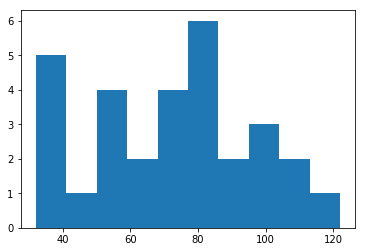

In [76]:
#Graphical Normality test
from matplotlib import pyplot

%matplotlib inline
pyplot.hist(df_titan["New Scheme (in thousands)"])

(array([2., 3., 2., 3., 6., 4., 5., 2., 1., 2.]),
 array([ 28. ,  36.2,  44.4,  52.6,  60.8,  69. ,  77.2,  85.4,  93.6,
        101.8, 110. ]),
 <a list of 10 Patch objects>)

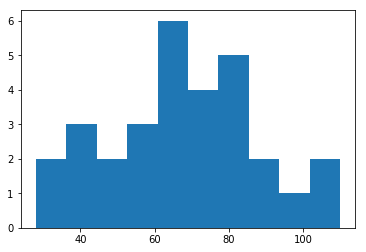

In [77]:
pyplot.hist(df_titan["Old Scheme (in thousands)"])

In [78]:
#statistical test of normality
from scipy.stats import shapiro
stat, p = shapiro(df_titan["New Scheme (in thousands)"])
print("Statistics=%.3f, p=%.3f" % (stat,p))

Statistics=0.969, p=0.506


In [79]:
from scipy.stats import shapiro
stat, p = shapiro(df_titan["Old Scheme (in thousands)"])
print("Statistics=%.3f, p=%.3f" % (stat,p))

Statistics=0.989, p=0.981


In [80]:
#Levene test for equal variance
import statistics as stats1
print("Std dev of old scheme",stats1.stdev(df_titan["Old Scheme (in thousands)"]))
print("Std dev of New scheme",stats1.stdev(df_titan["New Scheme (in thousands)"]))

Std dev of old scheme 20.455980212074454
Std dev of New scheme 24.06239494677769


In [81]:
from scipy.stats import levene
levene(df_titan["Old Scheme (in thousands)"],df_titan["New Scheme (in thousands)"])

LeveneResult(statistic=1.063061539437244, pvalue=0.30679836081811235)

Equal variance as p>0.05

In [82]:
#Using Paired t test for getting p value
from scipy.stats import ttest_rel

N = len(df_titan) #this is the sample size 
df = N-1
tstat,p = ttest_rel(df_titan["New Scheme (in thousands)"],df_titan["Old Scheme (in thousands)"])
print('TStat Value is ',tstat)
pvalue = 1-(stats.t.cdf(tstat,df))
print('P Value is ',pvalue)


TStat Value is  1.5559143823544377
P Value is  0.06528776980668838


# A2: p value is 0.065

# A3: p value(0.065) is greater than alpha (0.05), hence there is not enough evidence to reject the null hypothesis. 

Calculating the probability of type I error

In [83]:
#standard error of mean
from scipy.stats import sem
print(sem(df_titan["New Scheme (in thousands)"]))

4.393172166649487


In [84]:
#Z score calculation; mean difference:5k and calculating the standard error of mean using sem function
z_titan_new = 5/sem(df_titan["New Scheme (in thousands)"])
z_titan_new

1.13812976371771

In [85]:
#Evaluating p value from Z score
from scipy.stats import norm
p_values = norm.sf(abs(z_titan_new))
p_values

0.12753315072835936

# A4: a&b) Probablity of type I error is same as p-value in this case which is 0.127

Calculating power of test

In [86]:
#t = (xbar-mu)/(sd/math.sqrt(30))
#t values corresponding to alpha = 0.05 is -1.6991
xbar = 50 + ((df_titan["New Scheme (in thousands)"].std() * (-1.6991))/sqrt(30))

xbar

42.53556117164585

In [87]:
B = (xbar - 40)/((df_titan["New Scheme (in thousands)"].std()/sqrt(30)))
B

0.5771595274354185

In [88]:
power = 1 - B
power

0.42284047256458146